In [1]:
import pandas as pd
import numpy as np

## 샘플 데이터 생성

In [2]:
np.random.seed(42)
start_date=pd.to_datetime('2025-01-01')
end_date=pd.to_datetime('2025-04-30')

In [3]:
item_periods={'우유':7,'계란':10,'당근':14,'양파':21}

In [4]:
rows=[]
for item, period in item_periods.items():
  current=start_date
  while current<=end_date:
    jitter=np.random.randint(-2,3)
    purchase_date=current+pd.Timedelta(days=jitter)

    if start_date<=purchase_date<=end_date:
      qty=np.random.poisson(lam=2)
      if(qty>0):
        rows.append({'date':purchase_date, 'item': item, 'quantity': qty})
    current+=pd.Timedelta(days=period)

df_periodic=pd.DataFrame(rows).sort_values(['item','date']).reset_index(drop=True)
df_periodic

,date,item,quantity
0,2025-01-03,계란,2
1,2025-01-12,계란,2
2,2025-01-29,계란,2
3,2025-02-10,계란,2
4,2025-03-10,계란,2
5,2025-03-24,계란,4
6,2025-04-01,계란,4
7,2025-04-23,계란,2
8,2025-01-03,당근,2
9,2025-01-17,당근,1


## 데이터 확인

In [ ]:
import matplotlib.pyplot as plt

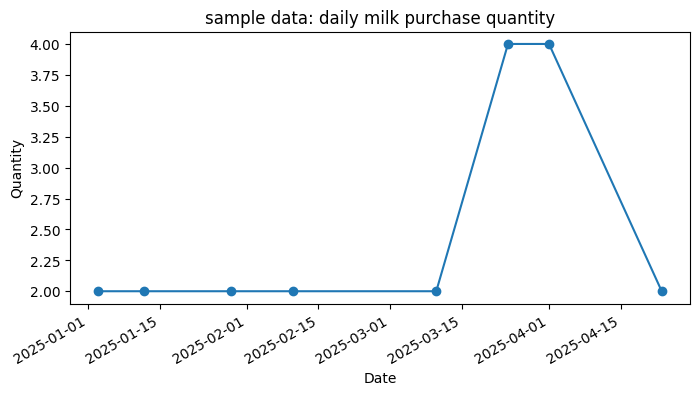

In [ ]:
milk=df_periodic[df_periodic['item']=='계란'].set_index('date')['quantity']
milk.plot(marker='o', figsize=(8,4))
plt.title('sample data: daily milk purchase quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

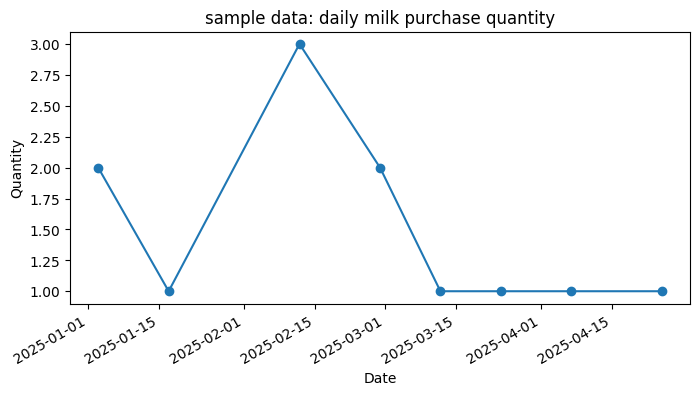

In [ ]:
milk=df_periodic[df_periodic['item']=='당근'].set_index('date')['quantity']
milk.plot(marker='o', figsize=(8,4))
plt.title('sample data: daily milk purchase quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

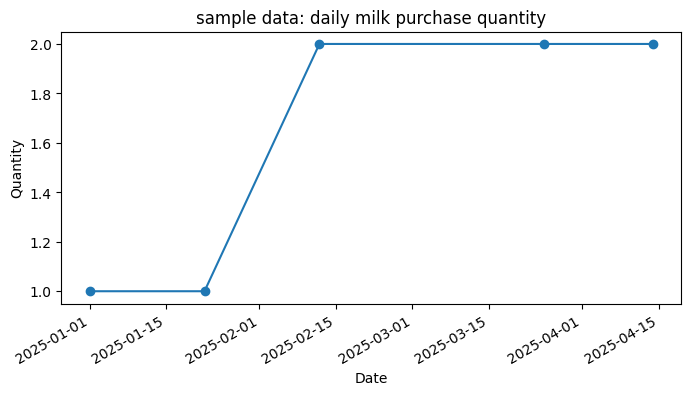

In [ ]:
milk=df_periodic[df_periodic['item']=='양파'].set_index('date')['quantity']
milk.plot(marker='o', figsize=(8,4))
plt.title('sample data: daily milk purchase quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

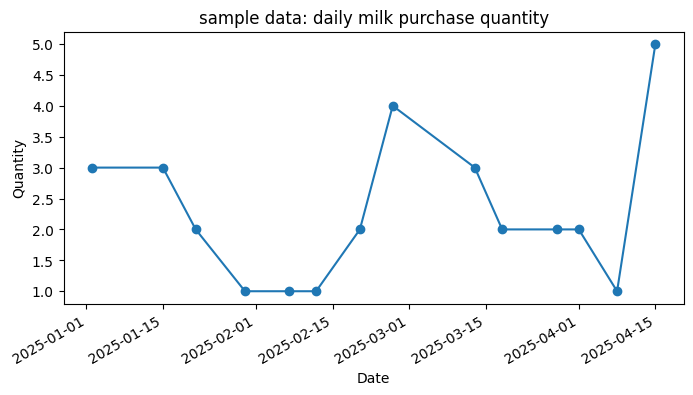

In [ ]:
milk=df_periodic[df_periodic['item']=='우유'].set_index('date')['quantity']
milk.plot(marker='o', figsize=(8,4))
plt.title('sample data: daily milk purchase quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

## 피처 엔지니어링

In [6]:
def make_features(df):
  df=df.sort_values(['item','date']).copy()
  df['prev_date']=df.groupby('item')['date'].shift(1) # 이전 구매일
  df['days_since_last']=(df['date']-df['prev_date']).dt.days # 직전 구매와의 간격
  df['rolling_mean_3']=df.groupby('item')['days_since_last'].transform(lambda x:x.rolling(3, min_periods=1).mean()) # 최근 3회 평균 간격
  df['prev_qty']=df.groupby('item')['quantity'].shift(1) # 이전 구매 수량
  df['qty_change_ratio']=df['quantity']/df['prev_qty'] # 수량 변화 배율

  return df.dropna(subset=['days_since_last']) # 첫 구매 제거

In [7]:
feature_df=make_features(df_periodic) # 모델 학습에 필요한 주요 변수들 생성
feature_df

,date,item,quantity,prev_date,days_since_last,rolling_mean_3,prev_qty,qty_change_ratio
1,2025-01-12,계란,3,2025-01-02,10.0,10.000000,1.0,3.000000
2,2025-01-22,계란,2,2025-01-12,10.0,10.000000,3.0,0.666667
3,2025-02-02,계란,3,2025-01-22,11.0,10.333333,2.0,1.500000
4,2025-02-08,계란,2,2025-02-02,6.0,9.000000,3.0,0.666667
5,2025-02-22,계란,3,2025-02-08,14.0,10.333333,2.0,1.500000
6,2025-03-03,계란,4,2025-02-22,9.0,9.666667,3.0,1.333333
7,2025-03-14,계란,4,2025-03-03,11.0,11.333333,4.0,1.000000
8,2025-03-24,계란,1,2025-03-14,10.0,10.000000,4.0,0.250000
9,2025-04-01,계란,1,2025-03-24,8.0,9.666667,1.0,1.000000
10,2025-04-10,계란,1,2025-04-01,9.0,9.000000,1.0,1.000000


## 모델 학습 및 평가

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error

In [ ]:
item_df = feature_df[feature_df['item']=='우유'].sort_values('date')

# 학습 데이터
X=item_df[['days_since_last', 'rolling_mean_3', 'prev_qty', 'qty_change_ratio']]
y=item_df['days_since_last']

# 시계열 교차검증 설정
tscv=TimeSeriesSplit(n_splits=3)
model=RandomForestRegressor(n_estimators=100, random_state=42)

# 교차검증 수행 -> MAE 평가
cv_scores=cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
print("CV MAE: ", -cv_scores.mean())

# 학습 및 예측
model.fit(X, y)
last=item_df.iloc[-1]
next_interval=model.predict([[last.days_since_last, last.rolling_mean_3, last.prev_qty, last.qty_change_ratio]])[0]
next_date=item_df['date'].max() + pd.Timedelta(days=int(next_interval)) # 다음 구매 날짜 계산
print("예상 다음 구매 간격(일): ", next_interval)
print("예상 다음 구매일: ", next_date.date())

CV MAE:  1.7777777777777777
예상 다음 구매 간격(일):  7.05
예상 다음 구매일:  2025-04-22


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
item_df = feature_df[feature_df['item']=='계란'].sort_values('date')

# 학습 데이터
X=item_df[['days_since_last', 'rolling_mean_3', 'prev_qty', 'qty_change_ratio']]
y=item_df['days_since_last']

# 시계열 교차검증 설정
tscv=TimeSeriesSplit(n_splits=3)
model=RandomForestRegressor(n_estimators=100, random_state=42)

# 교차검증 수행 -> MAE 평가
cv_scores=cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
print("CV MAE: ", -cv_scores.mean())

# 학습 및 예측
model.fit(X, y)
last=item_df.iloc[-1]
next_interval=model.predict([[last.days_since_last, last.rolling_mean_3, last.prev_qty, last.qty_change_ratio]])[0]
next_date=item_df['date'].max() + pd.Timedelta(days=int(next_interval)) # 다음 구매 날짜 계산
print("예상 다음 구매 간격(일): ", next_interval)
print("예상 다음 구매일: ", next_date.date())

CV MAE:  5.666666666666667
예상 다음 구매 간격(일):  19.83
예상 다음 구매일:  2025-05-12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
item_df = feature_df[feature_df['item']=='당근'].sort_values('date')

# 학습 데이터
X=item_df[['days_since_last', 'rolling_mean_3', 'prev_qty', 'qty_change_ratio']]
y=item_df['days_since_last']

# 시계열 교차검증 설정
tscv=TimeSeriesSplit(n_splits=3)
model=RandomForestRegressor(n_estimators=100, random_state=42)

# 교차검증 수행 -> MAE 평가
cv_scores=cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
print("CV MAE: ", -cv_scores.mean())

# 학습 및 예측
model.fit(X, y)
last=item_df.iloc[-1]
next_interval=model.predict([[last.days_since_last, last.rolling_mean_3, last.prev_qty, last.qty_change_ratio]])[0]
next_date=item_df['date'].max() + pd.Timedelta(days=int(next_interval)) # 다음 구매 날짜 계산
print("예상 다음 구매 간격(일): ", next_interval)
print("예상 다음 구매일: ", next_date.date())

CV MAE:  2.440000000000001
예상 다음 구매 간격(일):  16.54
예상 다음 구매일:  2025-05-11


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
item_df = feature_df[feature_df['item']=='양파'].sort_values('date')

# 학습 데이터
X=item_df[['days_since_last', 'rolling_mean_3', 'prev_qty', 'qty_change_ratio']]
y=item_df['days_since_last']

# 시계열 교차검증 설정
tscv=TimeSeriesSplit(n_splits=3)
model=RandomForestRegressor(n_estimators=100, random_state=42)

# 교차검증 수행 -> MAE 평가
cv_scores=cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
print("CV MAE: ", -cv_scores.mean())

# 학습 및 예측
model.fit(X, y)
last=item_df.iloc[-1]
next_interval=model.predict([[last.days_since_last, last.rolling_mean_3, last.prev_qty, last.qty_change_ratio]])[0]
next_date=item_df['date'].max() + pd.Timedelta(days=int(next_interval)) # 다음 구매 날짜 계산
print("예상 다음 구매 간격(일): ", next_interval)
print("예상 다음 구매일: ", next_date.date())

CV MAE:  10.4
예상 다음 구매 간격(일):  23.69
예상 다음 구매일:  2025-05-07


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## 성능 개선

### baseline_mae와 비교

In [ ]:
baseline_results=feature_df.groupby('item').apply(
    lambda g: pd.Series({
        'median_interval': g['days_since_last'].median(),
        'baseline_mae': np.mean(np.abs(g['days_since_last'] - g['days_since_last'].median()))
    })).reset_index()
baseline_results

<ipython-input-26-99cd0251c309>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  baseline_results=feature_df.groupby('item').apply(


,item,median_interval,baseline_mae
0,계란,14.0,5.428571
1,당근,14.0,3.142857
2,양파,21.0,5.250000
3,우유,7.0,2.307692


*   계란 5.67 > 5.42
*   당근 2.44 < 3.14
*   양파 10.4 > 5.25
*   우유 1.78 < 2.31


---

피처 추가 등의 성능 개선 필요

### 샘플 데이터 기간 12개월로 연장

In [8]:
np.random.seed(42)
start_date = pd.to_datetime('2025-01-01')
end_date = pd.to_datetime('2025-12-31')
item_periods = {'우유': 7, '계란': 10, '당근': 14, '양파': 21}

In [9]:
rows = []
for item, period in item_periods.items():
    current = start_date
    while current <= end_date:
        # ±2일 변동 (jitter 유지)
        jitter = np.random.randint(-2, 3)
        purchase_date = current + pd.Timedelta(days=jitter)
        if start_date <= purchase_date <= end_date:
            qty = np.random.poisson(lam=2)
            if qty > 0:
                rows.append({'date': purchase_date, 'item': item, 'quantity': qty})
        current += pd.Timedelta(days=period)

df_periodic = pd.DataFrame(rows).sort_values(['item', 'date']).reset_index(drop=True)
df_periodic

,date,item,quantity
0,2025-01-09,계란,3
1,2025-01-30,계란,3
2,2025-02-11,계란,4
3,2025-02-18,계란,4
4,2025-02-28,계란,1
...,...,...,...
104,2025-11-26,우유,2
105,2025-12-02,우유,2
106,2025-12-08,우유,1
107,2025-12-19,우유,2


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df_periodic.to_csv('/content/drive/MyDrive/user_data')

### 피처 확장

In [ ]:
import numpy as np

def make_features_ext(df):
    # 1) 정렬 & 복사
    df = df.sort_values(['item', 'date']).copy()

    # 2) 기본 피처
    df['prev_date'] = df.groupby('item')['date'].shift(1)
    df['days_since_last'] = (df['date'] - df['prev_date']).dt.days
    df['rolling_mean_3'] = (
        df.groupby('item')['days_since_last']
          .transform(lambda x: x.rolling(3, min_periods=1).mean())
    )
    df['rolling_median_3'] = (
        df.groupby('item')['days_since_last']
          .transform(lambda x: x.rolling(3, min_periods=1).median())
    )
    df['prev_qty'] = df.groupby('item')['quantity'].shift(1)
    df['qty_change_ratio'] = df['quantity'] / df['prev_qty']
    df['period'] = df['item'].map(item_periods)

    # 3) 날짜 관련 피처
    #    date 컬럼이 datetime 타입이라 가정
    df['month']   = df['date'].dt.month
    df['weekday'] = df['date'].dt.weekday  # 0=월요일, …, 6=일요일

    # 4) 사이클릭 변환 (주기성을 수치로 표현)
    df['wday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['wday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
    # month-1 로 0~11 매핑하거나 바로 month/12 써도 OK
    df['mon_sin']  = np.sin(2 * np.pi * (df['month'] - 1) / 12)
    df['mon_cos']  = np.cos(2 * np.pi * (df['month'] - 1) / 12)

    # 5) NA 제거 (처음 몇 행은 prev_date NaN)
    return df.dropna(subset=['days_since_last'])

feature_df_ext = make_features_ext(df_periodic)
feature_df_ext

,date,item,quantity,prev_date,days_since_last,rolling_mean_3,rolling_median_3,prev_qty,qty_change_ratio,period,month,weekday,wday_sin,wday_cos,mon_sin,mon_cos
1,2025-01-30,계란,3,2025-01-09,21.0,21.000000,21.0,3.0,1.000000,10,1,3,0.433884,-0.900969,0.000000,1.000000
2,2025-02-11,계란,4,2025-01-30,12.0,16.500000,16.5,3.0,1.333333,10,2,1,0.781831,0.623490,0.500000,0.866025
3,2025-02-18,계란,4,2025-02-11,7.0,13.333333,12.0,4.0,1.000000,10,2,1,0.781831,0.623490,0.500000,0.866025
4,2025-02-28,계란,1,2025-02-18,10.0,9.666667,10.0,4.0,0.250000,10,2,4,-0.433884,-0.900969,0.500000,0.866025
5,2025-03-13,계란,2,2025-02-28,13.0,10.000000,10.0,1.0,2.000000,10,3,3,0.433884,-0.900969,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2025-11-26,우유,2,2025-11-18,8.0,7.333333,8.0,3.0,0.666667,7,11,2,0.974928,-0.222521,-0.866025,0.500000
105,2025-12-02,우유,2,2025-11-26,6.0,6.000000,6.0,2.0,1.000000,7,12,1,0.781831,0.623490,-0.500000,0.866025
106,2025-12-08,우유,1,2025-12-02,6.0,6.666667,6.0,2.0,0.500000,7,12,0,0.000000,1.000000,-0.500000,0.866025
107,2025-12-19,우유,2,2025-12-08,11.0,7.666667,6.0,1.0,2.000000,7,12,4,-0.433884,-0.900969,-0.500000,0.866025


In [ ]:
# 1. “계란” 행만 남겼다고 가정
df_egg = feature_df_ext[feature_df_ext['item'] == '계란']

# 2. 예측 시점(마지막) 행 가져오기
last = df_egg.iloc[-1]

# 3. 모델에 넣을 피처 배열 생성
features = [
    float(last['days_since_last']),   # 마지막 구매 이후 일수
    float(last['rolling_mean_3']),    # 최근 3회 평균 간격
    float(last['rolling_median_3']),  # 최근 3회 중앙값 간격
    float(last['prev_qty']),          # 직전 구매 수량
    float(last['qty_change_ratio']),  # 수량 증감 비율
    int(last['period']),              # known period
    int(last['month'])
]

print(features)

[8.0, 10.0, 8.0, 4.0, 0.5, 10, 12]


In [ ]:
# 1. “우유” 행만 남겼다고 가정
df_milk = feature_df_ext[feature_df_ext['item'] == '우유']

# 2. 예측 시점(마지막) 행 가져오기
last = df_milk.iloc[-1]

# 3. 모델에 넣을 피처 배열 생성
features = [
    float(last['days_since_last']),
    float(last['rolling_mean_3']),
    float(last['rolling_median_3']),
    float(last['prev_qty']),
    float(last['qty_change_ratio']),
    int(last['period']),
    int(last['month'])
]

print(features)

[4.0, 7.0, 6.0, 2.0, 0.5, 7, 12]


In [ ]:
# 1. “당근” 행만 남겼다고 가정
df_carrot = feature_df_ext[feature_df_ext['item'] == '당근']

# 2. 예측 시점(마지막) 행 가져오기
last = df_carrot.iloc[-1]

# 3. 모델에 넣을 피처 배열 생성
features = [
    float(last['days_since_last']),
    float(last['rolling_mean_3']),
    float(last['rolling_median_3']),
    float(last['prev_qty']),
    float(last['qty_change_ratio']),
    int(last['period']),
    int(last['month'])
]

print(features)

[10.0, 17.333333333333332, 18.0, 2.0, 2.0, 14, 12]


In [ ]:
# 1. “양파” 행만 남겼다고 가정
df_onion = feature_df_ext[feature_df_ext['item'] == '양파']

# 2. 예측 시점(마지막) 행 가져오기
last = df_onion.iloc[-1]

# 3. 모델에 넣을 피처 배열 생성
features = [
    float(last['days_since_last']),
    float(last['rolling_mean_3']),
    float(last['rolling_median_3']),
    float(last['prev_qty']),
    float(last['qty_change_ratio']),
    int(last['period']),
    int(last['month'])
]

print(features)

[21.0, 20.333333333333332, 20.0, 1.0, 2.0, 21, 12]


### 랜덤포레스트 재시도

In [ ]:
item_df = feature_df_ext[feature_df_ext['item'] == '우유'] \
            .sort_values('date')

X = item_df[[
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]]
y = item_df['days_since_last']

# 시계열 교차검증 & 모델
tscv  = TimeSeriesSplit(n_splits=3)
model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(
    model, X, y,
    cv=tscv,
    scoring='neg_mean_absolute_error'
)
print("CV MAE:", -cv_scores.mean())

# 전체 학습 & 다음 구매일 예측
model.fit(X, y)

last = item_df.iloc[-1]
feat = [
    last.days_since_last,
    last.rolling_mean_3,
    last.rolling_median_3,
    last.prev_qty,
    last.qty_change_ratio,
    last.period,
    last.month
]
next_interval = model.predict([feat])[0]

next_date = last['date'] + pd.Timedelta(days=int(next_interval))

print("예상 다음 구매 간격(일):", next_interval)
print("예상 다음 구매일:", next_date.date())

CV MAE: 0.9776666666666665
예상 다음 구매 간격(일): 4.0
예상 다음 구매일: 2025-12-27


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
item_df = feature_df_ext[feature_df_ext['item'] == '계란'] \
            .sort_values('date')

X = item_df[[
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]]
y = item_df['days_since_last']

# 시계열 교차검증 & 모델
tscv  = TimeSeriesSplit(n_splits=3)
model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(
    model, X, y,
    cv=tscv,
    scoring='neg_mean_absolute_error'
)
print("CV MAE:", -cv_scores.mean())

# 전체 학습 & 다음 구매일 예측
model.fit(X, y)

last = item_df.iloc[-1]
feat = [
    last.days_since_last,
    last.rolling_mean_3,
    last.rolling_median_3,
    last.prev_qty,
    last.qty_change_ratio,
    last.period,
    last.month
]
next_interval = model.predict([feat])[0]

next_date = last['date'] + pd.Timedelta(days=int(next_interval))

print("예상 다음 구매 간격(일):", next_interval)
print("예상 다음 구매일:", next_date.date())

CV MAE: 0.8419047619047618
예상 다음 구매 간격(일): 7.97
예상 다음 구매일: 2025-12-12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
item_df = feature_df_ext[feature_df_ext['item'] == '당근'] \
            .sort_values('date')

X = item_df[[
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]]
y = item_df['days_since_last']

# 시계열 교차검증 & 모델
tscv  = TimeSeriesSplit(n_splits=3)
model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(
    model, X, y,
    cv=tscv,
    scoring='neg_mean_absolute_error'
)
print("CV MAE:", -cv_scores.mean())

# 전체 학습 & 다음 구매일 예측
model.fit(X, y)

last = item_df.iloc[-1]
feat = [
    last.days_since_last,
    last.rolling_mean_3,
    last.rolling_median_3,
    last.prev_qty,
    last.qty_change_ratio,
    last.period,
    last.month
]
next_interval = model.predict([feat])[0]

next_date = last['date'] + pd.Timedelta(days=int(next_interval))

print("예상 다음 구매 간격(일):", next_interval)
print("예상 다음 구매일:", next_date.date())

CV MAE: 2.653333333333333
예상 다음 구매 간격(일): 10.62
예상 다음 구매일: 2026-01-08


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
item_df = feature_df_ext[feature_df_ext['item'] == '양파'] \
            .sort_values('date')

X = item_df[[
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]]
y = item_df['days_since_last']

# 시계열 교차검증 & 모델
tscv  = TimeSeriesSplit(n_splits=3)
model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(
    model, X, y,
    cv=tscv,
    scoring='neg_mean_absolute_error'
)
print("CV MAE:", -cv_scores.mean())

# 전체 학습 & 다음 구매일 예측
model.fit(X, y)

last = item_df.iloc[-1]
feat = [
    last.days_since_last,
    last.rolling_mean_3,
    last.rolling_median_3,
    last.prev_qty,
    last.qty_change_ratio,
    last.period,
    last.month
]
next_interval = model.predict([feat])[0]

next_date = last['date'] + pd.Timedelta(days=int(next_interval))

print("예상 다음 구매 간격(일):", next_interval)
print("예상 다음 구매일:", next_date.date())

CV MAE: 4.195555555555555
예상 다음 구매 간격(일): 20.91
예상 다음 구매일: 2025-12-21


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


당근과 양파 여전히 MAE 높음

## 구매 수량 예측 추가

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [ ]:
# 1) “양파” 데이터만 추출하고 날짜 순 정렬
item_df = (
    feature_df_ext[feature_df_ext['item'] == '양파']
    .sort_values('date')
    .reset_index(drop=True)
)

# 2) 다음 구매 수량(target) 컬럼 생성
#    quantity 컬럼을 한 칸 아래로 밀어서 “next_qty”로
item_df['next_qty'] = item_df['quantity'].shift(-1)

# 3) 학습에 사용할 행: 마지막 행은 next_qty가 NaN이므로 제외
train_df = item_df.dropna(subset=['next_qty']).copy()

# 4) 피처와 타깃 정의
feat_cols = [
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]
X = train_df[feat_cols]
y_interval = train_df['days_since_last']  # 다음 구매까지 간격(일)
y_qty      = train_df['next_qty']         # 다음 구매 수량

In [ ]:
# 5) 시계열 교차검증 세팅
tscv = TimeSeriesSplit(n_splits=3)

# 6) 간격 예측 모델 CV
model_interval = RandomForestRegressor(n_estimators=100, random_state=42)
scores_i = cross_val_score(
    model_interval, X, y_interval,
    cv=tscv,
    scoring='neg_mean_absolute_error'
)
print("CV MAE (간격):", -scores_i.mean())

# 7) 수량 예측 모델 CV
model_qty = RandomForestRegressor(n_estimators=100, random_state=42)
scores_q = cross_val_score(
    model_qty, X, y_qty,
    cv=tscv,
    scoring='neg_mean_absolute_error'
)
print("CV MAE (수량):", -scores_q.mean())

CV MAE (간격): 4.6049999999999995
CV MAE (수량): 1.7016666666666669


In [ ]:
# 8) 두 모델 전체 학습
model_interval.fit(X, y_interval)
model_qty.fit(X, y_qty)

# 9) 가장 마지막 행을 뽑아 예측용 feature 배열 생성
last = item_df.iloc[-1]
feat = [ last[c] for c in feat_cols ]

# 10) 예측
pred_interval = model_interval.predict([feat])[0]
pred_qty      = model_qty.predict([feat])[0]

# 11) 다음 구매일 계산 (마지막 date 에 pred_interval 일 더하기)
next_date = pd.to_datetime(last['date']) + pd.Timedelta(days=int(pred_interval))

# 12) 결과 출력
print(f"예상 다음 구매 간격(일): {pred_interval:.2f}")
print(f"예상 다음 구매일     : {next_date.date()}")
print(f"예상 다음 구매 수량  : {pred_qty:.0f}개")


예상 다음 구매 간격(일): 20.72
예상 다음 구매일     : 2025-12-21
예상 다음 구매 수량  : 1개


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## 앙상블 (구매 수량)

### 양파

In [ ]:
!pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
item_df = (
    feature_df_ext[feature_df_ext['item'] == '양파']
    .sort_values('date')
    .reset_index(drop=True)
)

# 2) 다음 구매 수량 타깃 생성
item_df['next_qty'] = item_df['quantity'].shift(-1)

# 3) 학습용 데이터셋: 마지막 행(next_qty NaN) 제외
train_df = item_df.dropna(subset=['next_qty']).copy()

# 4) 피처 & 타깃 정의
feat_cols = [
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]
X = train_df[feat_cols]
y = train_df['next_qty']

In [ ]:
# 5) 시계열 CV 설정
tscv = TimeSeriesSplit(n_splits=3)

# 6) 개별 모델 정의
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbose =-1)
cgb = CatBoostRegressor(
    iterations=200, learning_rate=0.05, random_state=42,
    verbose=False
)

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
# 7) Voting 앙상블 구성 (평균)
ensemble = VotingRegressor([
    ('xgb', xgb),
    ('lgb', lgb),
    ('cgb', cgb)
])

# 8) CV MAE 평가
for name, model in [('XGBoost', xgb), ('LightGBM', lgb), ('CatBoost', cgb), ('Ensemble', ensemble)]:
    scores = cross_val_score(
        model, X, y,
        cv=tscv,
        scoring='neg_mean_absolute_error'
    )
    print(f"CV MAE ({name}): {(-scores.mean()):.3f}")

# 9) 전체 학습 & 마지막 행 예측
ensemble.fit(X, y)
last = item_df.iloc[-1]
feat = np.array([last[c] for c in feat_cols]).reshape(1, -1)
pred_qty = ensemble.predict(feat)[0]

print(f"\n▶ 최종 추천 구매 수량(앙상블): {pred_qty:.0f}개")

CV MAE (XGBoost): 0.999
CV MAE (LightGBM): 1.452
CV MAE (CatBoost): 1.406
CV MAE (Ensemble): 1.286

▶ 최종 추천 구매 수량(앙상블): 2개


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 계란

In [ ]:
item_df = (
    feature_df_ext[feature_df_ext['item'] == '계란']
    .sort_values('date')
    .reset_index(drop=True)
)

# 2) 다음 구매 수량 타깃 생성
item_df['next_qty'] = item_df['quantity'].shift(-1)

# 3) 학습용 데이터셋: 마지막 행(next_qty NaN) 제외
train_df = item_df.dropna(subset=['next_qty']).copy()

# 4) 피처 & 타깃 정의
feat_cols = [
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]
X = train_df[feat_cols]
y = train_df['next_qty']

In [ ]:
# 5) 시계열 CV 설정
tscv = TimeSeriesSplit(n_splits=3)

# 6) 개별 모델 정의
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbose =-1)
cgb = CatBoostRegressor(
    iterations=200, learning_rate=0.05, random_state=42,
    verbose=False
)

In [ ]:
# 7) Voting 앙상블 구성 (평균)
ensemble = VotingRegressor([
    ('xgb', xgb),
    ('lgb', lgb),
    ('cgb', cgb)
])

# 8) CV MAE 평가
for name, model in [('XGBoost', xgb), ('LightGBM', lgb), ('CatBoost', cgb), ('Ensemble', ensemble)]:
    scores = cross_val_score(
        model, X, y,
        cv=tscv,
        scoring='neg_mean_absolute_error'
    )
    print(f"CV MAE ({name}): {(-scores.mean()):.3f}")

# 9) 전체 학습 & 마지막 행 예측
ensemble.fit(X, y)
last = item_df.iloc[-1]
feat = np.array([last[c] for c in feat_cols]).reshape(1, -1)
pred_qty = ensemble.predict(feat)[0]

print(f"\n▶ 최종 추천 구매 수량(앙상블): {pred_qty:.0f}개")

CV MAE (XGBoost): 1.289
CV MAE (LightGBM): 1.100
CV MAE (CatBoost): 1.151
CV MAE (Ensemble): 1.134

▶ 최종 추천 구매 수량(앙상블): 2개


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 우유

In [ ]:
item_df = (
    feature_df_ext[feature_df_ext['item'] == '우유']
    .sort_values('date')
    .reset_index(drop=True)
)

# 2) 다음 구매 수량 타깃 생성
item_df['next_qty'] = item_df['quantity'].shift(-1)

# 3) 학습용 데이터셋: 마지막 행(next_qty NaN) 제외
train_df = item_df.dropna(subset=['next_qty']).copy()

# 4) 피처 & 타깃 정의
feat_cols = [
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]
X = train_df[feat_cols]
y = train_df['next_qty']

In [ ]:
# 5) 시계열 CV 설정
tscv = TimeSeriesSplit(n_splits=3)

# 6) 개별 모델 정의
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbose =-1)
cgb = CatBoostRegressor(
    iterations=200, learning_rate=0.05, random_state=42,
    verbose=False
)

In [ ]:
# 7) Voting 앙상블 구성 (평균)
ensemble = VotingRegressor([
    ('xgb', xgb),
    ('lgb', lgb),
    ('cgb', cgb)
])

# 8) CV MAE 평가
for name, model in [('XGBoost', xgb), ('LightGBM', lgb), ('CatBoost', cgb), ('Ensemble', ensemble)]:
    scores = cross_val_score(
        model, X, y,
        cv=tscv,
        scoring='neg_mean_absolute_error'
    )
    print(f"CV MAE ({name}): {(-scores.mean()):.3f}")

# 9) 전체 학습 & 마지막 행 예측
ensemble.fit(X, y)
last = item_df.iloc[-1]
feat = np.array([last[c] for c in feat_cols]).reshape(1, -1)
pred_qty = ensemble.predict(feat)[0]

print(f"\n▶ 최종 추천 구매 수량(앙상블): {pred_qty:.0f}개")

CV MAE (XGBoost): 1.030
CV MAE (LightGBM): 0.754
CV MAE (CatBoost): 0.788
CV MAE (Ensemble): 0.818

▶ 최종 추천 구매 수량(앙상블): 2개


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 당근

In [ ]:
item_df = (
    feature_df_ext[feature_df_ext['item'] == '당근']
    .sort_values('date')
    .reset_index(drop=True)
)

# 2) 다음 구매 수량 타깃 생성
item_df['next_qty'] = item_df['quantity'].shift(-1)

# 3) 학습용 데이터셋: 마지막 행(next_qty NaN) 제외
train_df = item_df.dropna(subset=['next_qty']).copy()

# 4) 피처 & 타깃 정의
feat_cols = [
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]
X = train_df[feat_cols]
y = train_df['next_qty']

In [ ]:
# 5) 시계열 CV 설정
tscv = TimeSeriesSplit(n_splits=3)

# 6) 개별 모델 정의
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbose =-1)
cgb = CatBoostRegressor(
    iterations=200, learning_rate=0.05, random_state=42,
    verbose=False
)

In [ ]:
# 7) Voting 앙상블 구성 (평균)
ensemble = VotingRegressor([
    ('xgb', xgb),
    ('lgb', lgb),
    ('cgb', cgb)
])

# 8) CV MAE 평가
for name, model in [('XGBoost', xgb), ('LightGBM', lgb), ('CatBoost', cgb), ('Ensemble', ensemble)]:
    scores = cross_val_score(
        model, X, y,
        cv=tscv,
        scoring='neg_mean_absolute_error'
    )
    print(f"CV MAE ({name}): {(-scores.mean()):.3f}")

# 9) 전체 학습 & 마지막 행 예측
ensemble.fit(X, y)
last = item_df.iloc[-1]
feat = np.array([last[c] for c in feat_cols]).reshape(1, -1)
pred_qty = ensemble.predict(feat)[0]

print(f"\n▶ 최종 추천 구매 수량(앙상블): {pred_qty:.0f}개")

CV MAE (XGBoost): 0.979
CV MAE (LightGBM): 1.111
CV MAE (CatBoost): 0.816
CV MAE (Ensemble): 0.820

▶ 최종 추천 구매 수량(앙상블): 3개


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 앙상블 (구매 날짜+수량)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, basic as lgb_basic
from catboost import CatBoostRegressor

### 양파

In [ ]:
# 1) “양파” 데이터 준비
item_df = (
    feature_df_ext[feature_df_ext['item'] == '양파']
    .sort_values('date')
    .reset_index(drop=True)
)

# 2) 타깃 생성: 간격(y_interval), 수량(y_qty)
item_df['next_qty']      = item_df['quantity'].shift(-1)
# y_interval은 days_since_last 컬럼 자체를 타깃으로 사용

# 3) 학습용 데이터 (마지막 행 제외)
train_df = item_df.dropna(subset=['next_qty']).copy()

# 4) 피처 정의
feat_cols = [
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]
X = train_df[feat_cols]
y_interval = train_df['days_since_last']
y_qty      = train_df['next_qty']

In [ ]:
# 5) 시계열 CV 세팅
tscv = TimeSeriesSplit(n_splits=3)

# 6) 개별 모델 정의
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=0)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbose=-1)
cgb = CatBoostRegressor(iterations=200, learning_rate=0.05, random_state=42, verbose=False)

# 7) 앙상블 구성
ensemble_interval = VotingRegressor([('xgb', xgb), ('lgb', lgb), ('cgb', cgb)])
ensemble_qty      = VotingRegressor([('xgb', xgb), ('lgb', lgb), ('cgb', cgb)])

# 8) CV MAE 출력
for name, model, y in [
    ('Interval', ensemble_interval, y_interval),
    ('Quantity', ensemble_qty,      y_qty)
]:
    scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
    print(f"CV MAE ({name}): {(-scores.mean()):.3f}")

CV MAE (Interval): 4.061
CV MAE (Quantity): 1.286


In [ ]:
# 9) 전체 학습
ensemble_interval.fit(X, y_interval)
ensemble_qty.fit(X, y_qty)

# 10) 마지막 행으로 예측
last = item_df.iloc[-1]
feat = np.array([last[c] for c in feat_cols]).reshape(1, -1)

pred_interval = ensemble_interval.predict(feat)[0]
pred_qty      = ensemble_qty.predict(feat)[0]

# 11) 날짜 계산
next_date = pd.to_datetime(last['date']) + timedelta(days=int(pred_interval))

# 12) 결과 한 번에 출력
print(f"▶ 추천 구매 수량  : {pred_qty:.0f}개")
print(f"▶ 예상 다음 구매일: {next_date.date()}")

▶ 추천 구매 수량  : 2개
▶ 예상 다음 구매일: 2025-12-23


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 계란

In [ ]:
# 1) “계란” 데이터 준비
item_df = (
    feature_df_ext[feature_df_ext['item'] == '계란']
    .sort_values('date')
    .reset_index(drop=True)
)

# 2) 타깃 생성: 간격(y_interval), 수량(y_qty)
item_df['next_qty']      = item_df['quantity'].shift(-1)
# y_interval은 days_since_last 컬럼 자체를 타깃으로 사용

# 3) 학습용 데이터 (마지막 행 제외)
train_df = item_df.dropna(subset=['next_qty']).copy()

# 4) 피처 정의
feat_cols = [
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]
X = train_df[feat_cols]
y_interval = train_df['days_since_last']
y_qty      = train_df['next_qty']

In [ ]:
# 5) 시계열 CV 세팅
tscv = TimeSeriesSplit(n_splits=3)

# 6) 개별 모델 정의
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=0)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbose=-1)
cgb = CatBoostRegressor(iterations=200, learning_rate=0.05, random_state=42, verbose=False)

# 7) 앙상블 구성
ensemble_interval = VotingRegressor([('xgb', xgb), ('lgb', lgb), ('cgb', cgb)])
ensemble_qty      = VotingRegressor([('xgb', xgb), ('lgb', lgb), ('cgb', cgb)])

# 8) CV MAE 출력
for name, model, y in [
    ('Interval', ensemble_interval, y_interval),
    ('Quantity', ensemble_qty,      y_qty)
]:
    scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
    print(f"CV MAE ({name}): {(-scores.mean()):.3f}")

CV MAE (Interval): 1.451
CV MAE (Quantity): 1.134


In [ ]:
# 9) 전체 학습
ensemble_interval.fit(X, y_interval)
ensemble_qty.fit(X, y_qty)

# 10) 마지막 행으로 예측
last = item_df.iloc[-1]
feat = np.array([last[c] for c in feat_cols]).reshape(1, -1)

pred_interval = ensemble_interval.predict(feat)[0]
pred_qty      = ensemble_qty.predict(feat)[0]

# 11) 날짜 계산
next_date = pd.to_datetime(last['date']) + timedelta(days=int(pred_interval))

# 12) 결과 한 번에 출력
print(f"▶ 추천 구매 수량  : {pred_qty:.0f}개")
print(f"▶ 예상 다음 구매일: {next_date.date()}")

▶ 추천 구매 수량  : 2개
▶ 예상 다음 구매일: 2025-12-14


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 우유

In [ ]:
# 1) “우유” 데이터 준비
item_df = (
    feature_df_ext[feature_df_ext['item'] == '우유']
    .sort_values('date')
    .reset_index(drop=True)
)

# 2) 타깃 생성: 간격(y_interval), 수량(y_qty)
item_df['next_qty']      = item_df['quantity'].shift(-1)
# y_interval은 days_since_last 컬럼 자체를 타깃으로 사용

# 3) 학습용 데이터 (마지막 행 제외)
train_df = item_df.dropna(subset=['next_qty']).copy()

# 4) 피처 정의
feat_cols = [
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]
X = train_df[feat_cols]
y_interval = train_df['days_since_last']
y_qty      = train_df['next_qty']

In [ ]:
# 5) 시계열 CV 세팅
tscv = TimeSeriesSplit(n_splits=3)

# 6) 개별 모델 정의
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=0)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbose=-1)
cgb = CatBoostRegressor(iterations=200, learning_rate=0.05, random_state=42, verbose=False)

# 7) 앙상블 구성
ensemble_interval = VotingRegressor([('xgb', xgb), ('lgb', lgb), ('cgb', cgb)])
ensemble_qty      = VotingRegressor([('xgb', xgb), ('lgb', lgb), ('cgb', cgb)])

# 8) CV MAE 출력
for name, model, y in [
    ('Interval', ensemble_interval, y_interval),
    ('Quantity', ensemble_qty,      y_qty)
]:
    scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
    print(f"CV MAE ({name}): {(-scores.mean()):.3f}")

CV MAE (Interval): 1.557
CV MAE (Quantity): 0.818


In [ ]:
# 9) 전체 학습
ensemble_interval.fit(X, y_interval)
ensemble_qty.fit(X, y_qty)

# 10) 마지막 행으로 예측
last = item_df.iloc[-1]
feat = np.array([last[c] for c in feat_cols]).reshape(1, -1)

pred_interval = ensemble_interval.predict(feat)[0]
pred_qty      = ensemble_qty.predict(feat)[0]

# 11) 날짜 계산
next_date = pd.to_datetime(last['date']) + timedelta(days=int(pred_interval))

# 12) 결과 한 번에 출력
print(f"▶ 추천 구매 수량  : {pred_qty:.0f}개")
print(f"▶ 예상 다음 구매일: {next_date.date()}")

▶ 추천 구매 수량  : 2개
▶ 예상 다음 구매일: 2025-12-28


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 당근

In [ ]:
# 1) “당근” 데이터 준비
item_df = (
    feature_df_ext[feature_df_ext['item'] == '당근']
    .sort_values('date')
    .reset_index(drop=True)
)

# 2) 타깃 생성: 간격(y_interval), 수량(y_qty)
item_df['next_qty']      = item_df['quantity'].shift(-1)
# y_interval은 days_since_last 컬럼 자체를 타깃으로 사용

# 3) 학습용 데이터 (마지막 행 제외)
train_df = item_df.dropna(subset=['next_qty']).copy()

# 4) 피처 정의
feat_cols = [
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]
X = train_df[feat_cols]
y_interval = train_df['days_since_last']
y_qty      = train_df['next_qty']

In [ ]:
# 5) 시계열 CV 세팅
tscv = TimeSeriesSplit(n_splits=3)

# 6) 개별 모델 정의
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=0)
lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbose=-1)
cgb = CatBoostRegressor(iterations=200, learning_rate=0.05, random_state=42, verbose=False)

# 7) 앙상블 구성
ensemble_interval = VotingRegressor([('xgb', xgb), ('lgb', lgb), ('cgb', cgb)])
ensemble_qty      = VotingRegressor([('xgb', xgb), ('lgb', lgb), ('cgb', cgb)])

# 8) CV MAE 출력
for name, model, y in [
    ('Interval', ensemble_interval, y_interval),
    ('Quantity', ensemble_qty,      y_qty)
]:
    scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
    print(f"CV MAE ({name}): {(-scores.mean()):.3f}")

CV MAE (Interval): 2.743
CV MAE (Quantity): 0.820


In [ ]:
# 9) 전체 학습
ensemble_interval.fit(X, y_interval)
ensemble_qty.fit(X, y_qty)

# 10) 마지막 행으로 예측
last = item_df.iloc[-1]
feat = np.array([last[c] for c in feat_cols]).reshape(1, -1)

pred_interval = ensemble_interval.predict(feat)[0]
pred_qty      = ensemble_qty.predict(feat)[0]

# 11) 날짜 계산
next_date = pd.to_datetime(last['date']) + timedelta(days=int(pred_interval))

# 12) 결과 한 번에 출력
print(f"▶ 추천 구매 수량  : {pred_qty:.0f}개")
print(f"▶ 예상 다음 구매일: {next_date.date()}")

▶ 추천 구매 수량  : 3개
▶ 예상 다음 구매일: 2026-01-12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## AWS 연동

In [ ]:
from joblib import dump

# 1) 추천 수량 모델 저장
dump(ensemble_interval, 'ensemble_interval.joblib')
# 2) 구매 간격(날짜) 모델 저장
dump(ensemble_qty, 'ensemble_qty.joblib')

print("✅ 모델 파일 생성 완료:",
      "ensemble_interval.joblib,",
      "ensemble_qty.joblib")

✅ 모델 파일 생성 완료: ensemble_interval.joblib, ensemble_qty.joblib


## 프론트 연동

In [ ]:
from joblib import dump

# model: 이미 학습된 scikit-learn 모델
dump(model, 'purchase_model.joblib')
print("✅ 모델 저장 완료: purchase_model.joblib")

✅ 모델 저장 완료: purchase_model.joblib


In [ ]:
!pip install flask flask-cors joblib

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
from joblib import load
import numpy as np

In [ ]:
# 1) 앱 초기화
app = Flask(__name__)
CORS(app)  # 모든 도메인에서 호출 허용

In [ ]:
# 2) 학습된 모델 불러오기
model = load('./purchase_model.joblib')

In [ ]:
# 3) 예측 엔드포인트 정의
@app.route('/predict', methods=['POST'])
def predict():
    """
    요청 JSON 형식:
      { "features": [f1, f2, f3, ...] }
    응답 JSON 형식:
      { "recommended_qty": 정수 }
    """
    data = request.get_json()               # JSON 파싱
    features = data.get('features', [])     # 리스트 꺼내기
    x = np.array(features).reshape(1, -1)   # 2D 배열 형태로 변환
    pred = model.predict(x)[0]              # 예측값 추출
    return jsonify({"recommended_qty": int(pred)})

In [ ]:
# 4) 서버 실행
if __name__ == '__main__':
    # host='0.0.0.0' 로 하면 외부(로컬 네트워크)에서도 접속 가능
    app.run(host='0.0.0.0', port=5000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


## 2차 성능 개선

### 하이퍼파라미터 튜닝

#### 당근 Final model CV MAE: 3.1006666666666667

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
item='당근'
item_df=feature_df_ext[feature_df_ext['item']==item].sort_values('date')

X = item_df[[
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]]
y = item_df['days_since_last']

tscv=TimeSeriesSplit(n_splits=3)

# 파라미터 분포 정의
param_dist={
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.5]
}

In [ ]:
# RandomForest 모델과 RandomizedSearchCV 설정
rf=RandomForestRegressor(random_state=42)
mae_scorer=make_scorer(mean_absolute_error, greater_is_better=False)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=tscv,
    scoring=mae_scorer,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X,y)

best_params=random_search.best_params_
best_mae=-random_search.best_score_
print(f"Best parameters for {item}: {best_params}")
print(f"Optimized CV MAE: {best_mae:.4f}")

Best parameters for 당근: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
Optimized CV MAE: 3.1007


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa

In [ ]:
best_params = {
    'n_estimators':      100,
    'min_samples_split': 2,
    'min_samples_leaf':  1,
    'max_features':      0.5,
    'max_depth':         None
}

In [ ]:
final_model = RandomForestRegressor(
    n_estimators=      best_params['n_estimators'],
    min_samples_split= best_params['min_samples_split'],
    min_samples_leaf=  best_params['min_samples_leaf'],
    max_features=      best_params['max_features'],
    max_depth=         best_params['max_depth'],
    random_state=42
)

In [ ]:
final_model.fit(X, y)

# 4) (선택) 교차검증으로 최종 MAE 확인
tscv = TimeSeriesSplit(n_splits=3)
cv_scores = cross_val_score(
    final_model, X, y,
    cv=tscv,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False)
)
print("Final model CV MAE:", -cv_scores.mean())


Final model CV MAE: 3.1006666666666667


In [ ]:
# 5) 마지막 행으로부터 다음 구매 간격 예측
last = item_df.iloc[-1]
feat = [
    last.days_since_last,
    last.rolling_mean_3,
    last.rolling_median_3,
    last.prev_qty,
    last.qty_change_ratio,
    last.period,
    last.month
]
next_interval = final_model.predict([feat])[0]
next_date = last['date'] + pd.Timedelta(days=int(next_interval))

print(f"Predicted next purchase interval (days): {next_interval:.2f}")
print(f"Predicted next purchase date: {next_date.date()}")

Predicted next purchase interval (days): 11.61
Predicted next purchase date: 2026-01-09


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### 우유 Final model CV MAE: 1.5667645394420404

In [ ]:
item='우유'
item_df=feature_df_ext[feature_df_ext['item']==item].sort_values('date')

X = item_df[[
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]]
y = item_df['days_since_last']

tscv=TimeSeriesSplit(n_splits=3)

# 파라미터 분포 정의
param_dist={
    'n_estimators': [100, 200, 500, 800, 1000],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5, 0.7]
}

In [ ]:
# RandomForest 모델과 RandomizedSearchCV 설정
rf=RandomForestRegressor(random_state=42)
mae_scorer=make_scorer(mean_absolute_error, greater_is_better=False)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=tscv,
    scoring=mae_scorer,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X,y)

best_params=random_search.best_params_
best_mae=-random_search.best_score_
print(f"Best parameters for {item}: {best_params}")
print(f"Optimized CV MAE: {best_mae:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters for 우유: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 10}
Optimized CV MAE: 1.5668


In [ ]:
best_params = {
    'n_estimators':      1000,
    'min_samples_split': 5,
    'min_samples_leaf':  1,
    'max_features':      0.5,
    'max_depth':         10
}

In [ ]:
final_model = RandomForestRegressor(
    n_estimators=      best_params['n_estimators'],
    min_samples_split= best_params['min_samples_split'],
    min_samples_leaf=  best_params['min_samples_leaf'],
    max_features=      best_params['max_features'],
    max_depth=         best_params['max_depth'],
    random_state=42
)

In [ ]:
final_model.fit(X, y)

# 4) (선택) 교차검증으로 최종 MAE 확인
tscv = TimeSeriesSplit(n_splits=3)
cv_scores = cross_val_score(
    final_model, X, y,
    cv=tscv,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False)
)
print("Final model CV MAE:", -cv_scores.mean())


Final model CV MAE: 1.5667645394420404


In [ ]:
# 5) 마지막 행으로부터 다음 구매 간격 예측
last = item_df.iloc[-1]
feat = [
    last.days_since_last,
    last.rolling_mean_3,
    last.rolling_median_3,
    last.prev_qty,
    last.qty_change_ratio,
    last.period,
    last.month
]
next_interval = final_model.predict([feat])[0]
next_date = last['date'] + pd.Timedelta(days=int(next_interval))

print(f"Predicted next purchase interval (days): {next_interval:.2f}")
print(f"Predicted next purchase date: {next_date.date()}")

Predicted next purchase interval (days): 4.67
Predicted next purchase date: 2025-12-27


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### 계란 Final model CV MAE: 1.1355227513227508

In [ ]:
item='계란'
item_df=feature_df_ext[feature_df_ext['item']==item].sort_values('date')

X = item_df[[
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]]
y = item_df['days_since_last']


tscv=TimeSeriesSplit(n_splits=3)

# 파라미터 분포 정의
param_dist={
    'n_estimators': [100, 200, 500, 800, 1000],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5, 0.7]
}

In [ ]:
# RandomForest 모델과 RandomizedSearchCV 설정
rf=RandomForestRegressor(random_state=42)
mae_scorer=make_scorer(mean_absolute_error, greater_is_better=False)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=tscv,
    scoring=mae_scorer,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X,y)

best_params=random_search.best_params_
best_mae=-random_search.best_score_
print(f"Best parameters for {item}: {best_params}")
print(f"Optimized CV MAE: {best_mae:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters for 계란: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 10}
Optimized CV MAE: 1.1355


In [ ]:
best_params = {
    'n_estimators':      500,
    'min_samples_split': 2,
    'min_samples_leaf':  2,
    'max_features':      0.5,
    'max_depth':         10
}

In [ ]:
final_model = RandomForestRegressor(
    n_estimators=      best_params['n_estimators'],
    min_samples_split= best_params['min_samples_split'],
    min_samples_leaf=  best_params['min_samples_leaf'],
    max_features=      best_params['max_features'],
    max_depth=         best_params['max_depth'],
    random_state=42
)

In [ ]:
final_model.fit(X, y)

# 4) (선택) 교차검증으로 최종 MAE 확인
tscv = TimeSeriesSplit(n_splits=3)
cv_scores = cross_val_score(
    final_model, X, y,
    cv=tscv,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False)
)
print("Final model CV MAE:", -cv_scores.mean())


Final model CV MAE: 1.1355227513227508


In [ ]:
# 5) 마지막 행으로부터 다음 구매 간격 예측
last = item_df.iloc[-1]
feat = [
    last.days_since_last,
    last.rolling_mean_3,
    last.rolling_median_3,
    last.prev_qty,
    last.qty_change_ratio,
    last.period,
    last.month
]
next_interval = final_model.predict([feat])[0]
next_date = last['date'] + pd.Timedelta(days=int(next_interval))

print(f"Predicted next purchase interval (days): {next_interval:.2f}")
print(f"Predicted next purchase date: {next_date.date()}")

Predicted next purchase interval (days): 8.57
Predicted next purchase date: 2025-12-13


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### 양파 Final model CV MAE: 4.617222222222222

In [ ]:
item='양파'
item_df=feature_df_ext[feature_df_ext['item']==item].sort_values('date')

X = item_df[[
    'days_since_last',
    'rolling_mean_3',
    'rolling_median_3',
    'prev_qty',
    'qty_change_ratio',
    'period',
    'month'
]]
y = item_df['days_since_last']

tscv=TimeSeriesSplit(n_splits=3)

# 파라미터 분포 정의
param_dist={
    'n_estimators': [100, 200, 500, 800, 1000],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5, 0.7]
}

In [ ]:
# RandomForest 모델과 RandomizedSearchCV 설정
rf=RandomForestRegressor(random_state=42)
mae_scorer=make_scorer(mean_absolute_error, greater_is_better=False)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=tscv,
    scoring=mae_scorer,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X,y)

best_params=random_search.best_params_
best_mae=-random_search.best_score_
print(f"Best parameters for {item}: {best_params}")
print(f"Optimized CV MAE: {best_mae:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters for 양파: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Optimized CV MAE: 4.6172


In [ ]:
best_params = {
    'n_estimators':      200,
    'min_samples_split': 2,
    'min_samples_leaf':  1,
    'max_features':      'sqrt',
    'max_depth':         20
}

In [ ]:
final_model = RandomForestRegressor(
    n_estimators=      best_params['n_estimators'],
    min_samples_split= best_params['min_samples_split'],
    min_samples_leaf=  best_params['min_samples_leaf'],
    max_features=      best_params['max_features'],
    max_depth=         best_params['max_depth'],
    random_state=42
)

In [ ]:
final_model.fit(X, y)

# 4) (선택) 교차검증으로 최종 MAE 확인
tscv = TimeSeriesSplit(n_splits=3)
cv_scores = cross_val_score(
    final_model, X, y,
    cv=tscv,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False)
)
print("Final model CV MAE:", -cv_scores.mean())


Final model CV MAE: 4.617222222222222


In [ ]:
# 5) 마지막 행으로부터 다음 구매 간격 예측
last = item_df.iloc[-1]
feat = [
    last.days_since_last,
    last.rolling_mean_3,
    last.rolling_median_3,
    last.prev_qty,
    last.qty_change_ratio,
    last.period,
    last.month
]
next_interval = final_model.predict([feat])[0]
next_date = last['date'] + pd.Timedelta(days=int(next_interval))

print(f"Predicted next purchase interval (days): {next_interval:.2f}")
print(f"Predicted next purchase date: {next_date.date()}")

Predicted next purchase interval (days): 21.05
Predicted next purchase date: 2025-12-22


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Prophet 기반 예측

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
item='당근'
df_carrot=feature_df_ext[feature_df_ext['item']==item].sort_values('date')

In [ ]:
# 2) 실제 구매 날짜 목록 정렬
purchase_dates = df_carrot['date'].sort_values().unique()
# 학습 종료 직전까지의 마지막 두 구매일
train_end = purchase_dates[-2]
actual_next = purchase_dates[-1]

In [ ]:
# 3) 학습용 일별 시계열 생성 (train_end까지)
daily = df_carrot[df_carrot['date'] <= train_end] \
    .groupby('date').size().reset_index(name='y') \
    .rename(columns={'date':'ds'})
all_days = pd.date_range(start=daily['ds'].min(), end=train_end, freq='D')
train_df = pd.DataFrame({'ds': all_days}).merge(daily, on='ds', how='left').fillna({'y':0})

In [ ]:
# 4) Prophet 학습
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyv76bt9a/i6ouslec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyv76bt9a/m7b2mi1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55136', 'data', 'file=/tmp/tmpyv76bt9a/i6ouslec.json', 'init=/tmp/tmpyv76bt9a/m7b2mi1h.json', 'output', 'file=/tmp/tmpyv76bt9a/prophet_modelmf4ryt7h/prophet_model-20250503145520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 5) 미래 예측 (actual_next까지 예측)
horizon = (actual_next - train_end).days + 7
future = m.make_future_dataframe(periods=horizon, include_history=False)
forecast = m.predict(future)[['ds','yhat']].set_index('ds')
forecast['yhat_clipped'] = forecast['yhat'].clip(lower=0)

In [ ]:
# 6) 예측 다음 구매일 (threshold=0.5)
pred_next = forecast[(forecast.index > train_end) & (forecast['yhat_clipped']>0.5)].index.min()

# 7) 오차 계산
error_days = (pred_next - actual_next).days

# 8) 결과 출력 및 시각화
print(f"Actual next purchase date: {actual_next.date()}")
print(f"Predicted next purchase date: {pred_next.date()}")
print(f"Prediction error (days): {error_days}")

Actual next purchase date: 2025-12-29
Predicted next purchase date: 2025-12-30
Prediction error (days): 1


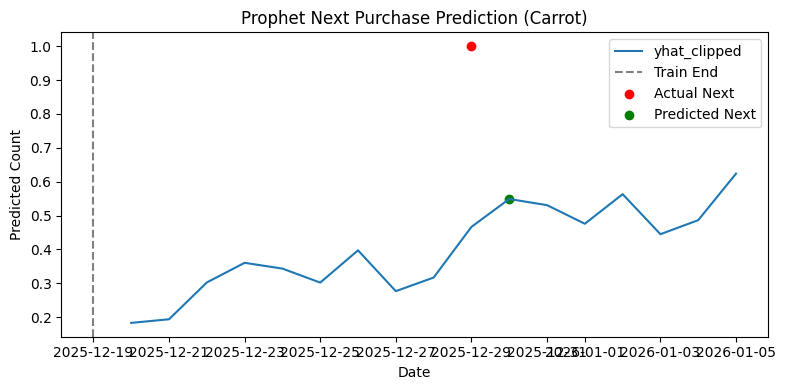

In [ ]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
# 학습 종료 후 실제 vs 예측 기간
period_idx = pd.date_range(start=train_end + pd.Timedelta(days=1), end=actual_next + pd.Timedelta(days=7))
actual_series = pd.Series(
    1, index=[actual_next]  # only actual next purchase event
)
pred_series = forecast['yhat_clipped']
plt.plot(pred_series.index, pred_series.values, label='yhat_clipped')
plt.axvline(train_end, color='gray', linestyle='--', label='Train End')
plt.scatter([actual_next], [1], color='red', label='Actual Next')
plt.scatter([pred_next], [pred_series.loc[pred_next]], color='green', label='Predicted Next')
plt.title('Prophet Next Purchase Prediction (Carrot)')
plt.xlabel('Date'); plt.ylabel('Predicted Count')
plt.legend(); plt.tight_layout()
plt.show()

In [ ]:
item='우유'
df_carrot=feature_df_ext[feature_df_ext['item']==item].sort_values('date')

In [ ]:
# 2) 실제 구매 날짜 목록 정렬
purchase_dates = df_carrot['date'].sort_values().unique()
# 학습 종료 직전까지의 마지막 두 구매일
train_end = purchase_dates[-2]
actual_next = purchase_dates[-1]

In [ ]:
# 3) 학습용 일별 시계열 생성 (train_end까지)
daily = df_carrot[df_carrot['date'] <= train_end] \
    .groupby('date').size().reset_index(name='y') \
    .rename(columns={'date':'ds'})
all_days = pd.date_range(start=daily['ds'].min(), end=train_end, freq='D')
train_df = pd.DataFrame({'ds': all_days}).merge(daily, on='ds', how='left').fillna({'y':0})

In [ ]:
# 4) Prophet 학습
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyv76bt9a/ajpy_vbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyv76bt9a/pexj_b1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98987', 'data', 'file=/tmp/tmpyv76bt9a/ajpy_vbn.json', 'init=/tmp/tmpyv76bt9a/pexj_b1l.json', 'output', 'file=/tmp/tmpyv76bt9a/prophet_model0fefx22r/prophet_model-20250503145746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 5) 미래 예측 (actual_next까지 예측)
horizon = (actual_next - train_end).days + 7
future = m.make_future_dataframe(periods=horizon, include_history=False)
forecast = m.predict(future)[['ds','yhat']].set_index('ds')
forecast['yhat_clipped'] = forecast['yhat'].clip(lower=0)

In [ ]:
# 6) 예측 다음 구매일 (threshold=0.5)
pred_next = forecast[(forecast.index > train_end) & (forecast['yhat_clipped']>0.5)].index.min()

# 7) 오차 계산
error_days = (pred_next - actual_next).days

# 8) 결과 출력 및 시각화
print(f"Actual next purchase date: {actual_next.date()}")
print(f"Predicted next purchase date: {pred_next.date()}")
print(f"Prediction error (days): {error_days}")

Actual next purchase date: 2025-12-23
Predicted next purchase date: 2025-12-26
Prediction error (days): 3


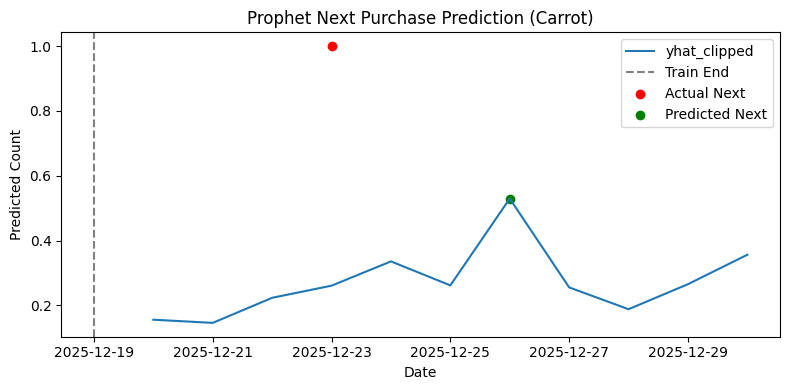

In [ ]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
# 학습 종료 후 실제 vs 예측 기간
period_idx = pd.date_range(start=train_end + pd.Timedelta(days=1), end=actual_next + pd.Timedelta(days=7))
actual_series = pd.Series(
    1, index=[actual_next]  # only actual next purchase event
)
pred_series = forecast['yhat_clipped']
plt.plot(pred_series.index, pred_series.values, label='yhat_clipped')
plt.axvline(train_end, color='gray', linestyle='--', label='Train End')
plt.scatter([actual_next], [1], color='red', label='Actual Next')
plt.scatter([pred_next], [pred_series.loc[pred_next]], color='green', label='Predicted Next')
plt.title('Prophet Next Purchase Prediction (Carrot)')
plt.xlabel('Date'); plt.ylabel('Predicted Count')
plt.legend(); plt.tight_layout()
plt.show()

In [ ]:
item='계란'
df_carrot=feature_df_ext[feature_df_ext['item']==item].sort_values('date')

In [ ]:
# 2) 실제 구매 날짜 목록 정렬
purchase_dates = df_carrot['date'].sort_values().unique()
# 학습 종료 직전까지의 마지막 두 구매일
train_end = purchase_dates[-2]
actual_next = purchase_dates[-1]

In [ ]:
# 3) 학습용 일별 시계열 생성 (train_end까지)
daily = df_carrot[df_carrot['date'] <= train_end] \
    .groupby('date').size().reset_index(name='y') \
    .rename(columns={'date':'ds'})
all_days = pd.date_range(start=daily['ds'].min(), end=train_end, freq='D')
train_df = pd.DataFrame({'ds': all_days}).merge(daily, on='ds', how='left').fillna({'y':0})

In [ ]:
# 4) Prophet 학습
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyv76bt9a/hqyk9uo_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyv76bt9a/6hguiedx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45430', 'data', 'file=/tmp/tmpyv76bt9a/hqyk9uo_.json', 'init=/tmp/tmpyv76bt9a/6hguiedx.json', 'output', 'file=/tmp/tmpyv76bt9a/prophet_modelmot9hno1/prophet_model-20250503145815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 5) 미래 예측 (actual_next까지 예측)
horizon = (actual_next - train_end).days + 7
future = m.make_future_dataframe(periods=horizon, include_history=False)
forecast = m.predict(future)[['ds','yhat']].set_index('ds')
forecast['yhat_clipped'] = forecast['yhat'].clip(lower=0)

In [ ]:
# 6) 예측 다음 구매일 (threshold=0.5)
pred_next = forecast[(forecast.index > train_end) & (forecast['yhat_clipped']>0.5)].index.min()

# 7) 오차 계산
error_days = (pred_next - actual_next).days

# 8) 결과 출력 및 시각화
print(f"Actual next purchase date: {actual_next.date()}")
print(f"Predicted next purchase date: {pred_next.date()}")
print(f"Prediction error (days): {error_days}")

Actual next purchase date: 2025-12-05
Predicted next purchase date: 2025-11-30
Prediction error (days): -5


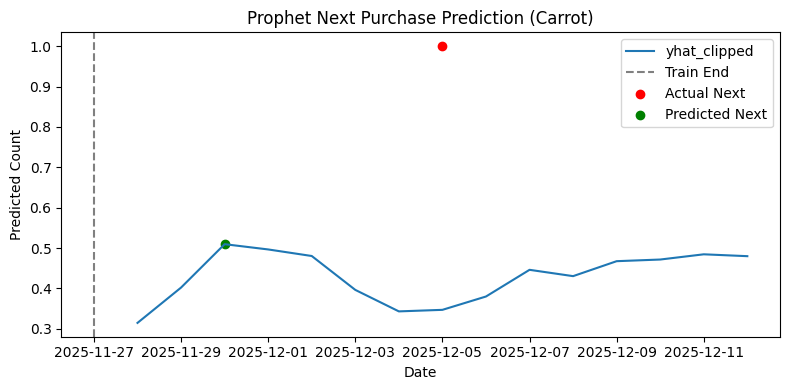

In [ ]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
# 학습 종료 후 실제 vs 예측 기간
period_idx = pd.date_range(start=train_end + pd.Timedelta(days=1), end=actual_next + pd.Timedelta(days=7))
actual_series = pd.Series(
    1, index=[actual_next]  # only actual next purchase event
)
pred_series = forecast['yhat_clipped']
plt.plot(pred_series.index, pred_series.values, label='yhat_clipped')
plt.axvline(train_end, color='gray', linestyle='--', label='Train End')
plt.scatter([actual_next], [1], color='red', label='Actual Next')
plt.scatter([pred_next], [pred_series.loc[pred_next]], color='green', label='Predicted Next')
plt.title('Prophet Next Purchase Prediction (Carrot)')
plt.xlabel('Date'); plt.ylabel('Predicted Count')
plt.legend(); plt.tight_layout()
plt.show()

In [ ]:
item='양파'
df_carrot=feature_df_ext[feature_df_ext['item']==item].sort_values('date')

In [ ]:
# 2) 실제 구매 날짜 목록 정렬
purchase_dates = df_carrot['date'].sort_values().unique()
# 학습 종료 직전까지의 마지막 두 구매일
train_end = purchase_dates[-2]
actual_next = purchase_dates[-1]

In [ ]:
# 3) 학습용 일별 시계열 생성 (train_end까지)
daily = df_carrot[df_carrot['date'] <= train_end] \
    .groupby('date').size().reset_index(name='y') \
    .rename(columns={'date':'ds'})
all_days = pd.date_range(start=daily['ds'].min(), end=train_end, freq='D')
train_df = pd.DataFrame({'ds': all_days}).merge(daily, on='ds', how='left').fillna({'y':0})

In [ ]:
# 4) Prophet 학습
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyv76bt9a/pwhe9i7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyv76bt9a/zac3ozm7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50192', 'data', 'file=/tmp/tmpyv76bt9a/pwhe9i7d.json', 'init=/tmp/tmpyv76bt9a/zac3ozm7.json', 'output', 'file=/tmp/tmpyv76bt9a/prophet_modele4j4wigk/prophet_model-20250503145954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 5) 미래 예측 (actual_next까지 예측)
horizon = (actual_next - train_end).days + 7
future = m.make_future_dataframe(periods=horizon, include_history=False)
forecast = m.predict(future)[['ds','yhat']].set_index('ds')
forecast['yhat_clipped'] = forecast['yhat'].clip(lower=0)

In [ ]:
# 6) 예측 다음 구매일 (threshold=0.5)
pred_next = forecast[(forecast.index > train_end) & (forecast['yhat_clipped']>0.5)].index.min()

# 7) 오차 계산
error_days = (pred_next - actual_next).days

# 8) 결과 출력 및 시각화
print(f"Actual next purchase date: {actual_next.date()}")
print(f"Predicted next purchase date: {pred_next.date()}")
print(f"Prediction error (days): {error_days}")

Actual next purchase date: 2025-12-01
Predicted next purchase date: 2025-11-20
Prediction error (days): -11


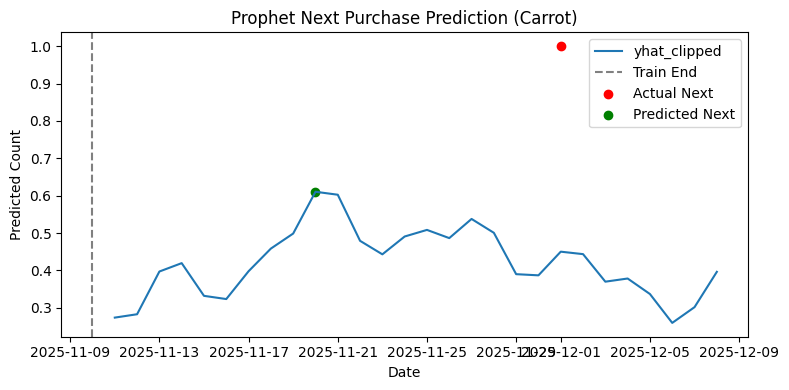

In [ ]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
# 학습 종료 후 실제 vs 예측 기간
period_idx = pd.date_range(start=train_end + pd.Timedelta(days=1), end=actual_next + pd.Timedelta(days=7))
actual_series = pd.Series(
    1, index=[actual_next]  # only actual next purchase event
)
pred_series = forecast['yhat_clipped']
plt.plot(pred_series.index, pred_series.values, label='yhat_clipped')
plt.axvline(train_end, color='gray', linestyle='--', label='Train End')
plt.scatter([actual_next], [1], color='red', label='Actual Next')
plt.scatter([pred_next], [pred_series.loc[pred_next]], color='green', label='Predicted Next')
plt.title('Prophet Next Purchase Prediction (Carrot)')
plt.xlabel('Date'); plt.ylabel('Predicted Count')
plt.legend(); plt.tight_layout()
plt.show()